# Convolutional Neural Network on Cifar10 dataset

## Import the required libraries

In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [9]:
print(tf.__version__)

2.0.0-beta0


## Download the dataset

In [4]:
cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [5]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


**There are 50,000 samples in the training set and 10,000 samples in the test set. Each sample is a (32, 32, 3) tensor. The tensor is 32 pixels wide, 32 pixels tall, and a total of 3 color channels**

## Preprocess the data

**We divide all pixel values by 255 so that the pixel values are between 0 and 1**

In [35]:
train_images = train_images/255.0
test_images = test_images/255.0

## Explore the dataset

**Pull out the first training image and display it**

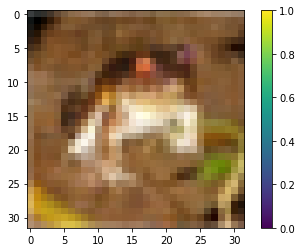

In [36]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

**Pull out more images from the training set and inspect it**

In [10]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

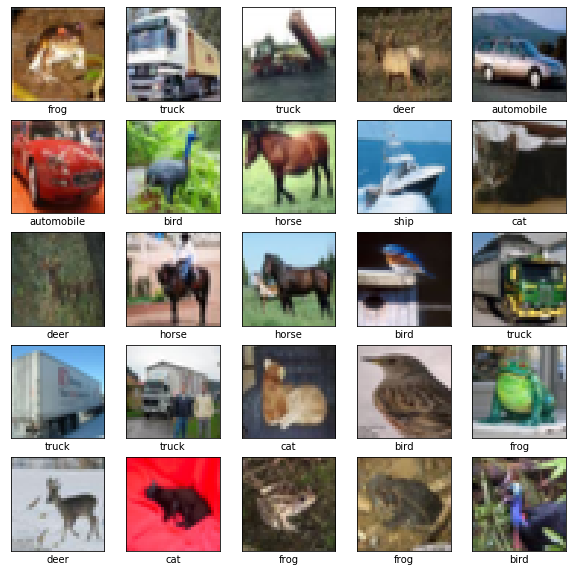

In [38]:
plt.figure(figsize=(10, 10))
for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[int(train_labels[i])])
plt.show()

## Build the model

In [39]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation=keras.activations.relu, input_shape=(32, 32, 3)))
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation=keras.activations.relu))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation=keras.activations.relu))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation=keras.activations.relu))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation=keras.activations.relu))
model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation=keras.activations.relu))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation=keras.activations.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 64)         

**Our neural network model consists of several convolutional layers, followed by max pooling layers, dropout layers (to reduce overfitting) and then a fully connected layer to predict to class probabilities**

## Compile the model with the Adam optimizer and categorical cross-entropy loss function

In [40]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

## Train the model

In [41]:
model.fit(train_images, train_labels, epochs=25)

Train on 50000 samples
Epoch 1/25
50000/50000 [==============================] - 293s 6ms/sample - loss: 1.6076 - accuracy: 0.4014
Epoch 2/25
50000/50000 [==============================] - 287s 6ms/sample - loss: 1.1989 - accuracy: 0.5687
Epoch 3/25
50000/50000 [==============================] - 281s 6ms/sample - loss: 1.0307 - accuracy: 0.6352
Epoch 4/25
50000/50000 [==============================] - 284s 6ms/sample - loss: 0.9380 - accuracy: 0.6687
Epoch 5/25
50000/50000 [==============================] - 281s 6ms/sample - loss: 0.8644 - accuracy: 0.6973
Epoch 6/25
50000/50000 [==============================] - 306s 6ms/sample - loss: 0.8258 - accuracy: 0.7097
Epoch 7/25
50000/50000 [==============================] - 294s 6ms/sample - loss: 0.7824 - accuracy: 0.7277
Epoch 8/25
50000/50000 [==============================] - 287s 6ms/sample - loss: 0.7543 - accuracy: 0.7354
Epoch 9/25
50000/50000 [==============================] - 293s 6ms/sample - loss: 0.7430 - accuracy: 0.7425
Epoch

## Evaluate the model

In [42]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_acc)

10000/10000 [==============================] - 17s 2ms/sample - loss: 0.6619 - accuracy: 0.7783
0.7783


## Save the model

**We save the model so that it can be used in the future**

In [44]:
model.save('cifar10-model.h5')

## Making some predictions

**Load the model that we had saved after training**

In [5]:
model = keras.models.load_model('cifar10-model.h5')

**Function to read the image from filepath and convert it to a tensor**

In [7]:
def load_image(path):
    img_raw = tf.io.read_file(path)
    img_tensor = tf.image.decode_jpeg(img_raw)
    img_final = tf.image.resize(img_tensor, [32, 32])
    img_final = img_final/255.0
    return img_final

In [39]:
img = load_image('frog.jpg')

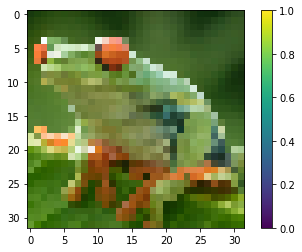

In [40]:
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.show()

In [41]:
predictions_single = model.predict(np.expand_dims(img, axis = 0))

In [42]:
print(predictions_single)

[[3.6424745e-04 9.9163572e-07 1.7514795e-01 4.3668380e-05 3.8256897e-07
  1.7505248e-05 8.2442141e-01 4.8010737e-08 2.3385517e-06 1.5004043e-06]]


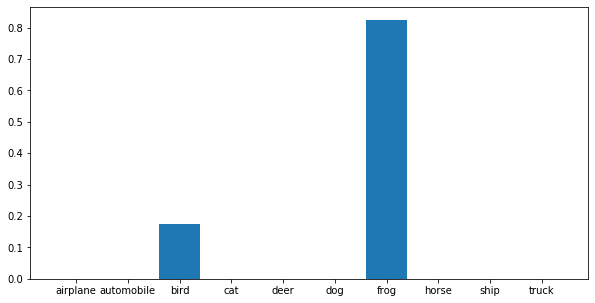

In [43]:
plt.figure(figsize=(10, 5))
plt.bar(class_names, predictions_single[0])
plt.show()

In [45]:
print("The final predicted value is:", class_names[np.argmax(predictions_single)])

The final predicted value is: frog


In [46]:
img = load_image('airplane.jpeg')

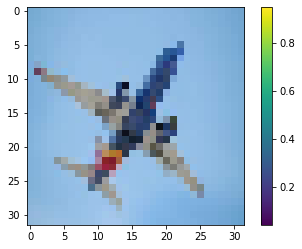

In [47]:
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.show()

In [48]:
predictions_single = model.predict(np.expand_dims(img, axis = 0))

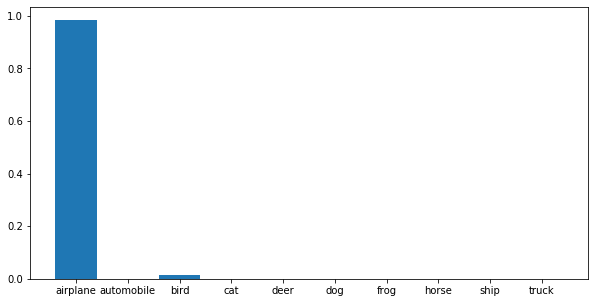

In [50]:
plt.figure(figsize=(10, 5))
plt.bar(class_names, predictions_single[0])
plt.show()

In [52]:
print("The final predicted value is:", class_names[np.argmax(predictions_single)])

The final predicted value is: airplane


In [53]:
img = load_image('horse.jpg')

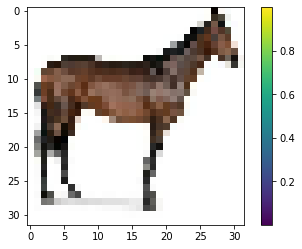

In [54]:
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.show()

In [56]:
predictions_single = model.predict(np.expand_dims(img, axis=0))

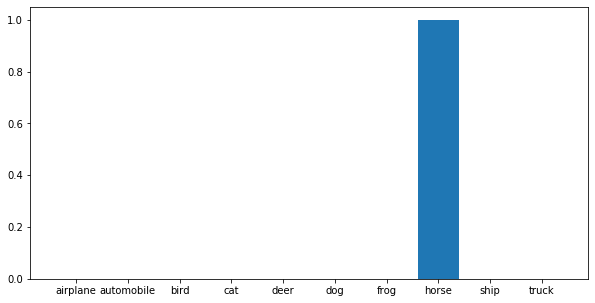

In [58]:
plt.figure(figsize=(10, 5))
plt.bar(class_names, predictions_single[0])
plt.show()

In [59]:
print("The final predicted value is:", class_names[np.argmax(predictions_single)])

The final predicted value is: horse
